# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/MvYh5qf.png)

El problema de ordenamiento lineal es un problema clásico de optimización combinatoria estudiado desde hace más de 50 años. Los diversos escenarios reales que provienen de situaciones surgidas en variados campos de la industria y otros sectores, han dado origen a distintas variaciones de este problema.




# 2. Quick Sort

El siguiente codigo muestra una implementacion del algoritmo QuickSort

## 2.1 Código

In [ ]:
k = 0
def partition_last(A, low, high):
  global k # contador de comparaciones
  pivot = A[high]
  i = low - 1
  for j in range(low,high): # recorremos todos los índices del (sub) arreglo
    k = k + 1 # sumamos 1 comparación
    # si el elemento A[j] es menor al pivote
    if(A[j]<pivot):
      i += 1
      A[i], A[j] = A[j], A[i] # se intercambia
  k = k + 1 # +1 comparación
  A[i+1], A[high] = A[high], A[i+1]
  return (i+1) # retornamos el nuevo índice del pivote



In [ ]:
k = 0
def partition_first(A, l, h):
  low, high = l, h
  global k
  if l != h and l < h:
    k = k + 1 # primera comparacion
    pivot = A[l]
    low += 1
    while low <= high:
      k = k + 1 # +1 comparación
      if A[high] < pivot and A[low] > pivot:
        A[high], A[low] = A[low], A[high]
      k = k + 1 # +1 comparación
      if not A[low] > pivot:
        low += 1
      k = k + 1 # +1 comparación
      if not A[high] < pivot:
        high -= 1
  A[l], A[high] = A[high], A[l]
  return high

In [ ]:
import random
import statistics
k = 0
# calculamos la mediana de una lista de 3 elementos aleatorios
# y lo intercambiamos a la primera posición, luego particionamos
def partition_rng(A, l, h):
  global k # contador de comparaciones
  randElements = list([A[random.randint(l, h)], A[random.randint(l, h)], A[random.randint(l, h)]])
  m = statistics.median(randElements)
  pivot_index = A.index(m)
  A[l], A[pivot_index] = A[pivot_index], A[l]
  pivot = A[l]
  i = l
  for j in range(l+1, h+1):
    k+=1 # sumamos comparacion
    if(A[j] < pivot):
      i+=1
      A[i], A[j] = A[j], A[i]
  k = k + 1 # +1 comparación
  A[i], A[l] = A[l], A[i]
  return i



In [ ]:
#Qsort

# This implementation utilizes pivot as the last element in the nums list
# It has a pointer to keep track of the elements smaller than the pivot
# At the very end of partition() function, the pointer is swapped with the pivot
# to come up with a "sorted" nums relative to the pivot


def partition(l, r, nums, verbose = False):
	if verbose == True: 
		print("array de entrada: ",nums)
	# Last element will be the pivot and the first element the pointer
	pivot, ptr = nums[r], l
	if verbose == True:
		print("pivote = ",pivot)
	for i in range(l, r):
		if nums[i] <= pivot:
			# Swapping values smaller than the pivot to the front
			nums[i], nums[ptr] = nums[ptr], nums[i]
			ptr += 1
	# Finally swapping the last element with the pointer indexed number
	nums[ptr], nums[r] = nums[r], nums[ptr]
	if verbose == True: 
		print("array de salida: ",nums)
	return ptr

# With quicksort() function, we will be utilizing the above code to obtain the pointer
# at which the left values are all smaller than the number at pointer index and vice versa
# for the right values.


def quicksort(l, r, nums, verbose = False,pivotselector = "default"):
	if len(nums) == 1: # Terminating Condition for recursion. VERY IMPORTANT!
		return nums
	if l < r:
		if (pivotselector == "default"):	
			pi = partition(l, r, nums,verbose)
		if (pivotselector == "first"):
			pi = partition_first(nums,l,r)
		if (pivotselector == "last"):
			pi = partition_last(nums,l,r)
		if (pivotselector == "rng"):
			pi = partition_rng(nums,l,r)
		
		quicksort(l, pi-1, nums,verbose,pivotselector) # Recursively sorting the left values
		quicksort(pi+1, r, nums,verbose,pivotselector) # Recursively sorting the right values
	return nums


example = [4, 5, 1, 2, 3,-1, 9, 17]
print(quicksort(0, len(example)-1, example))



[-1, 1, 2, 3, 4, 5, 9, 17]


## 2.2 Descripcion del algoritmo


Quicksort es un eficiente algoritmo de ordenación en el lugar, que suele funcionar de dos a tres veces más rápido que ordenar por fusión y heapsort cuando se implementa bien. Quicksort es una ordenación por comparación, lo que significa que puede ordenar elementos de cualquier tipo para los que menos que se define la relación. En implementaciones eficientes, por lo general no es un tipo estable.


El algoritmo recibe como entrada una lista (o arreglo) a con la secuencia de n elementos que queremos ordenar. Luego, los números se ordenan y retorna la misma lista de entrada.


1. Se hace uso de la función Partition que organiza los elementos a la izquierda y derecha de un pivote.

2. Si la partición resultante está compuesta de una sóla posición, entonces técnicamente está ordenada de menor a mayor, y por ende se retorna. En caso contrario, se repite el **paso 1**.

3. Finalmente y una vez ordenadas todas las particiones de menor a mayor, esto quiere decir por tanto que el arreglo original ya está ordenado de menor a mayor y, por tanto, se retorna.




## 2.3 Ejemplo

Como ejemplo tenemos un arreglo **a=[3,1,5,6,7,4]**

Se aplica la funcion de partition la cual nos divide el arreglo y elige un pivote el cual en este caso lo explicare con el ultimo elemento el cual seria **p=[4]**, tambien se tiene dos posiciones que serian **i** y **j** los cuales nos dan el primer elemento del arreglo y j nos da el ultimo elemento sin contar el pivote por lo tanto en este caso tendriamos **i=[3]**, **j=[7]**.

Se aplica la funcion quicksort la cual se llama recursivamente, lo que se hace es comparar nuestro i con el pivote, en la primera llamada vemos que i es menor al pivote por lo tanto corremos a la derecha la posicion de i, por lo que tendriamos 

**i=[1]**

tambien comparamos por la derecha y vemos que 6 es mayor por lo tanto el numero se queda en la misma  se quedaria en la misma y el j se mueve uno hacia la izquierda por lo que quedaria:

**j=[6]**

Nuevamente se hacen las comparaciones con el pivote, en este caso nuestro i es menor y nuestro j es mayor por lo tanto los numeros se mantienen y se mueven las posiciones, i y j nos quedan en la misma posicion.

**i,j=[5]**

en este momento intercambiamos el pivote con esta posicion y se aplica el partition por lo tanto nos queda una lista derecha y una lista izquierda

**arr.izq=[3,1,4]**

**arr.der=[5,7,6]**

se vuelven a comparar las listas como lo hicimos antes eligiendo un nuevo pivote, si esta vez se elige como pivote el numero del medio y se hacen las comparaciones nuestras listas nos quedarian las 2 listas ya ordenadas 

**arr.izq=[1,3,4]**

**arr.der=[5,6,7]**

finalmente como ya se encuentran ordenadas se unen ambas listas y nos arrojaria nuestro array ordenado 

**a=[1,3,4,5,6,7]**

## 2.4  Ejemplo (verbose == True)





In [ ]:
Array = [3,1,5,6,7,4]

Array = quicksort(0,len(Array)-1,Array,True)

array de entrada:  [3, 1, 5, 6, 7, 4]
pivote =  4
array de salida:  [3, 1, 4, 6, 7, 5]
array de entrada:  [3, 1, 4, 6, 7, 5]
pivote =  1
array de salida:  [1, 3, 4, 6, 7, 5]
array de entrada:  [1, 3, 4, 6, 7, 5]
pivote =  5
array de salida:  [1, 3, 4, 5, 7, 6]
array de entrada:  [1, 3, 4, 5, 7, 6]
pivote =  6
array de salida:  [1, 3, 4, 5, 6, 7]


#3. Tiempo de Ejecucion

El algoritmo *QuickSort* tiene un tiempo de ejecución de $O(n^2)$ en su **peor caso** y un tiempo de $O(n log n)$ en su **caso promedio**.

## Prueba del teorema

El algoritmo *QuickSort*, al ser un algoritmo recursivo (en el que cada vez el arreglo llamado a la función se divide en dos partes), tiene un tiempo de ejecución promedio de $O(n log n)$, esto para cuándo el pivote elegido en la función *partition* es la mediana del arreglo o un número cercano a esta. Sin embargo, este algoritmo también se caracteriza por la posibildad de bajar su rendimiento de tiempo de ejecución hasta un $O(n^2)$, caso que ocurre cuando el arreglo de entrada se encuentra ordenado de menor a mayor.

A continuación se verificará que el **teorema maestro** se puede utilizar para encontrar el tiempo de ejecución promedio de este algoritmo.

1. Antes de utilizar este teorema, es necesario verificar que la función de recurrencia de este algoritmo es de la forma $T(n) = aT(n/b) + f(n^d)$.

2. En este algoritmo, si se considera el mejor caso o caso promedio, el problema se divide cada vez en 2 sub problemas de tamaño 1/2 del problema original de forma recursiva. Además, la función *partition* tiene un tiempo de ejecución de $O(n)$.

3. Al saber lo anterior, se puede concluir que la función de recurrencia de *QuickSort* para su mejor caso y caso promedio es de la forma $T(n) = 2T(n/2) + O(n)$, por lo que se puede utilizar el teorema maestro para encontrar el tiempo de ejecución de este algoritmo.

A continuación se utilizará el **teorema maestro** para probar el teorema de tiempo de ejecución de este algoritmo.

1. Para encontrar el tiempo de ejecución, primero debemos visualizar las variables $a$, $b$ y $d$ en la función de recurrencia. En este caso son 2, 2 y 1 respectivamente.

2. Luego hay que evaluar si $a$ es igual, menor o mayor que $b^d$. Reemplazamos y queda que 2 = 2.

3. Finalmente, se reemplaza de nuevo en el tiempo de ejecución $O(n^d log n)$ y da que es igual a $O(n log n)$.

Finalmente, gracias al teorema maestro, se puede verificar que el tiempo de ejecución del algoritmo *QuickSort* es igual a $O(n log n)$, por lo que su teorema de ejecución es correcto.

# 4. Correctitud 

Para probar la correctitud de algoritmos recursivos usaremos inducción matemática.

En inducción matemática, para probar una declaración P(n), para todos los números naturales n, típicamente debemos:

1. Probar P(n) para un caso base, por ejemplo P(1).

2. Se asume que si P(m) es cierto para m < n, entonces P(n) también lo es. 

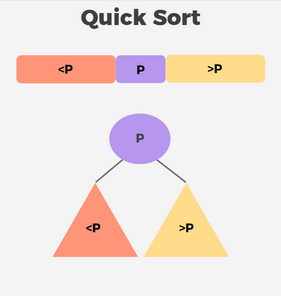

## 4.1 Teroema Correctitud Partition

El algoritmo Partition recibe un arreglo A[p..r], lo reorganiza y retorna un índice "q" de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

Propiedad invariante de bucle:

Al comienzo de cada iteración, se cumple que para cualquier índice k:

Si p ≤ k ≤ i, entonces A[ k ] ≤ A[ r ]

Si i < k < j, entonces A[ k ] > A[ r ]

*Siendo "p" el primer elemento del arreglo "i" el puntero y "j" indice que recorre.

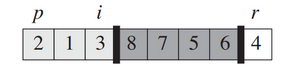


INICIALIZACIÓN

Primera iteración: Al comienzo de la primera iteración, i = p − 1 y j = p. Como no existe k tal que  p ≤ k ≤ i o i < k < j, los invariantes 1 y 2 son ciertos. 

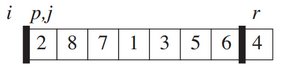

Mantenimiento

I-ésima iteración: Luego de una iésima iteración existen dos posibles

Arr[j] > r: 

La iteracion no cambia el arreglo y j se incrementa


Arr[j] <= r: 

A[i+1] se intercambia con A[j] e i se incrementa.

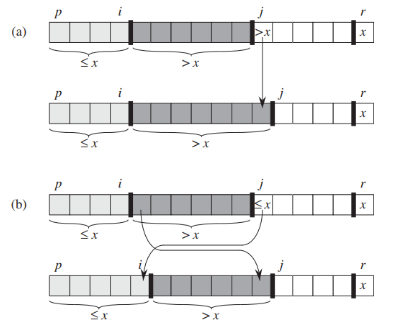





## 4.2 Teorema Correctitud Qsort

Para probar este segundo teorema utilizaremos la inducción matemática, donde para demostrar una declaración $P(n)$, debemos probar lo siguiente:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$.

2. Probar que si $P(m)$ es cierto, siendo que $m < n$, entonces $P(n)$ si lo es.

**Caso base** ${⇒}$ La función al recibir un arreglo de tamaño 1 (es decir que solo contiene un elemento) automaticamente se asume que está ordenado, por lo que nuestro punto 1 es correcto.

**Caso General** ${⇒}$ Considerando que nuestra función lo máximo que recibirá será un arreglo de tamaño n, recursivamente irá dividiendo el arreglo en subarreglos, en el mejor caso nuestra $m = {\frac n2}$ hasta llegar a nuestro caso base, por lo que nuestro segundo punto también es correcto.



# 5. Experimentos

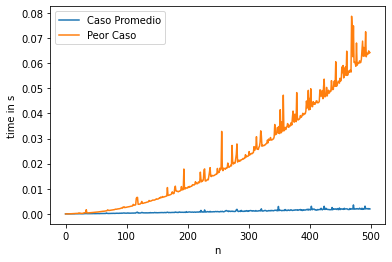

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import random


def randomArray(n):
  array = np.zeros(n)
  for i in range (len(array)):
    array[i] = int(random.randint(1,500))
  return array




z = np.zeros(500)
y = np.zeros(500)
ww = np.zeros(500)

x = [n for n in range(0,500)]
for i in range (0,500):
  array = randomArray(i)
  array1 = array
  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  z[i] = end - start





plt.plot(x,y,z)
plt.legend(["Caso Promedio","Peor Caso"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()
  





Analisis: El mejor caso se hace cuando el pivote queda en la ultima posicion y los elementos estan perfectamente ordenados de manera descendente, en cambio cuando los elementos estan ordenados de menor a mayor tiene una complejidad de O(n^2)

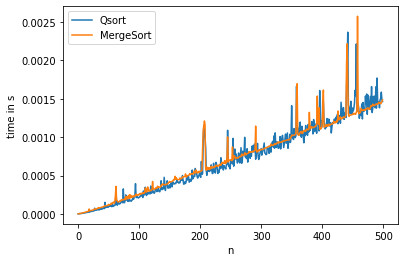

In [ ]:
def merge(left, right,verbose):
  global contComp
  if verbose == True:
    print("\nMERGE")
  ordenado = []
  i, j = 0, 0

  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      ordenado.append(left[i])
      i = i + 1
    else: 
      ordenado.append(right[j])
      j = j + 1

  while i < len(left): 
    
    ordenado.append(left[i])
    i = i + 1

  while j < len(right):
    ordenado.append(right[j])
    j = j + 1

  return ordenado

def mergeSort(arr, verbose = False):
  global contRec
  if verbose == True:
    print("Entrada de mergeSort: ",arr)


  if len(arr) < 2:
    return arr[:]
  else:
    middle = len(arr) // 2
    left = mergeSort(arr[:middle],verbose)
    right = mergeSort(arr[middle:],verbose)
    together = merge(left, right,verbose)
    if verbose == True:
      print('Subdivision ordenada: ', together,'\n')
    return together



z = np.zeros(500)
y = np.zeros(500)
x = [n for n in range(0,500)]


for i in range (0,500):
  array = randomArray(i)
  array1 = array
  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array = mergeSort(array1)
  end = time.time()
  z[i] = end - start


plt.plot(x,y)


plt.plot(x,z)
plt.legend(["Qsort","MergeSort"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()

La complejidad de ambos algoritmos es de O(nlogn) por lo que sus curvas son muy parecidas

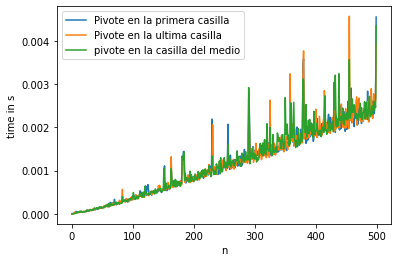

In [ ]:
z = np.zeros(500)
y = np.zeros(500)
ww = np.zeros(500)

x = [n for n in range(0,500)]
for i in range (0,500):
  array = randomArray(i)
  array1 = randomArray(i)
  array2 = randomArray(i)
  start = time.time()
  array = quicksort(0, len(array)-1, array,"first")
  end = time.time()
  y[i] = end - start

  start = time.time()
  array1 = quicksort(0, len(array)-1, array1,"last")
  end = time.time()
  z[i] = end - start

  start = time.time()
  array2 = quicksort(0, len(array)-1, array2,"rng")
  end = time.time()
  ww[i] = end - start





plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,ww)
plt.legend(["Pivote en la primera casilla","Pivote en la ultima casilla","pivote en la casilla del medio"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()
  

Al comparar los 3 pivotes first y last y rng( que calcula la mediana de 3 elementos), con arreglos totalmente aleatorios y distintos, se obtiene un tiempo de ejecucion muy parecido, esto cambiaria si los arreglos tuviesen un tipo de orden